In [183]:
from pycocotools.coco import COCO
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import torchvision

In [184]:
path = os.getcwd()
path_coco = os.path.join(path, 'data', 'coco')
path_imgs = os.path.join(path_coco, 'images', 'val2017')
path_annFile = os.path.join(path_coco, 'annotations', 'instances_val2017.json')

In [185]:
coco = COCO(path_annFile)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [271]:
categories = coco.loadCats(coco.getCatIds())
pprint(categories)

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [269]:
# Get categories and supercategories names
cat_names = {cat['id']: cat['name'] for cat in categories}
supercat_names = set([cat['supercategory'] for cat in categories])
pprint(list(cat_names.values()))
print('\n')
pprint(supercat_names)

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']


{'accessory',
 'animal',
 'appliance',
 'electronic',
 'f

In [189]:
# Random categories choice in order to have multiple categories in a single image
np.random.seed(51)
random_cat = list(np.random.choice(cat_names, 2))
random_cat

['couch', 'book']

In [190]:
# Get randomly an image ID containing both randomly chosen categories
catIds = coco.getCatIds(catNms = random_cat)
imgIds = coco.getImgIds(catIds=catIds)
np.random.seed(42)
imgId = np.random.choice(imgIds)
imgId

340175

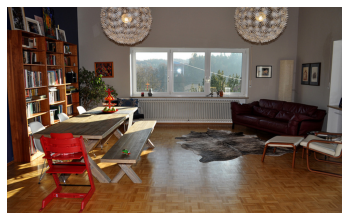

In [196]:
# Load and show image
imgInfo = coco.loadImgs([imgId])[0]
path_img = os.path.join(path_imgs, imgInfo['file_name'])
img = cv2.imread(path_img)
plt.axis('off')
plt.imshow(img[:, :, ::-1])

In [266]:
def draw_bounding_box(img_id, path, cat_names):
    '''
    Draw bounding boxes as well as cat label on images
    img_id: img_id in the COCO MS dataset
    path: location of the images
    '''
    
    # Get image from img_id
    imgInfo = coco.loadImgs([img_id])[0]
    path_img = os.path.join(path, imgInfo['file_name'])
    img = cv2.imread(path_img)
    
    # Get annotations
    annIds = coco.getAnnIds(imgIds = img_id)
    anns = coco.loadAnns(ids = annIds)
    
    # Draw bbox
    for ann in anns:
        cat_id = ann['category_id']
        bbox = ann['bbox']
        shape = [(int(bbox[0]), int(bbox[1])), (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))]
        img = cv2.rectangle(img, shape[0], shape[1], color=(255, 255, 255), thickness=2)
        cv2.putText(img, cat_names[cat_id], (int(bbox[0]), int(bbox[1] - 10)), cv2.FONT_HERSHEY_COMPLEX, 0.5, 
                    color=(255, 255, 255))
    
    #Display image
    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])

In [267]:
draw_bounding_box(img_id=imgId, path=path_imgs, cat_names=cat_names)

In [280]:
np.random.seed(17)
imgIds = coco.getImgIds()
img_id = np.random.choice(imgIds)
draw_bounding_box(img_id, path_imgs, cat_names)